In [1]:
import pandas as pd
import allel
import numpy as np
import seaborn as sns

SyntaxError: invalid syntax (470593452.py, line 9)

In [2]:
snps_names = pd.read_csv('../key_files/var_pos_grenenet.csv')

import pickle
with open('../key_files/blocks_snpsid_dict.pkl', 'rb') as f:
    dict_blocks = pickle.load(f)

reverse_mapping = {item: key for key, values in dict_blocks.items() for item in values}

snps_names = snps_names[snps_names['total_alleles05filter_firstgen'].notna()].reset_index(drop=True)

In [3]:
clim1001 = pd.read_csv('../key_files/1001g_regmap_grenet_ecotype_info_corrected_bioclim_2024May16.csv')

clim1001['ecotypeid'] = clim1001['ecotypeid'].astype(str)


In [4]:
founder_ecotypes = pd.read_csv('../key_files/founder_ecotype_names.csv')['0']

In [5]:
founder_ecotypes = founder_ecotypes.astype(str)

In [6]:
np.mean(clim1001[clim1001['ecotypeid'].isin(founder_ecotypes)]['bio1'])

9.584559885454384

In [7]:
np.median(clim1001[clim1001['ecotypeid'].isin(founder_ecotypes)]['bio1'])

9.54166698455811

In [8]:
#vcfgrene = allel.read_vcf('../gwas/greneNet_final_v1.1.recode.vcf.gz')
#vcfgrene = allel.read_vcf('../gwas/1001g/1001g_grenet_climate.recode.vcf')

# just a sample
vcfgrene = allel.read_vcf('../key_files/greneNet_final_v1.1_LDpruned.recode.vcf')

geno = vcfgrene['calldata/GT']

geno = geno.sum(axis=2)

geno = pd.DataFrame(geno)

geno.columns = vcfgrene['samples']

grene_chrom_pos = pd.DataFrame({'chrom': vcfgrene['variants/CHROM'], 'pos': vcfgrene['variants/POS']})

#vcfgrene = pd.concat([grene_chrom_pos, geno],axis=1)

In [9]:
clim1001 = clim1001[clim1001['ecotypeid'].isin(geno.columns)]

In [13]:
clim1001 = clim1001[['ecotypeid', 'bio1']]

In [14]:
clim1001['ecotypeid'] = clim1001['ecotypeid'].astype(str)

/tmp/ipykernel_127756/689236628.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clim1001['ecotypeid'] = clim1001['ecotypeid'].astype(str)


In [15]:
clim1001_dict = clim1001.set_index('ecotypeid')['bio1'].to_dict()

In [16]:
len(clim1001_dict)

231

In [17]:
geno.columns

Index(['10002', '10006', '10011', '10013', '10014', '159', '265', '5151',
       '5165', '5768',
       ...
       '9965', '9966', '9978', '9985', '100001', '100002', '6939', '9940',
       '9977', '9992'],
      dtype='object', length=231)

In [18]:
clim1001 = clim1001.set_index('ecotypeid')

In [21]:
geno = geno.T

In [22]:
geno

,0,1,2,3,4,5,6,7,8,9,...,13975,13976,13977,13978,13979,13980,13981,13982,13983,13984
10002,0,0,0,0,2,0,0,0,2,0,...,2,0,0,0,0,0,0,0,0,0
10006,0,2,0,0,0,2,2,2,0,0,...,2,0,0,0,0,2,0,0,0,0
10011,0,2,0,0,2,0,0,2,0,2,...,0,2,0,0,0,2,2,0,0,0
10013,0,0,0,2,2,0,0,0,2,0,...,2,0,0,0,2,0,0,2,0,0
10014,0,0,0,2,2,0,0,0,2,0,...,0,0,0,0,0,0,0,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100002,0,0,2,2,2,0,2,0,0,0,...,2,0,2,0,2,0,0,0,0,0
6939,0,0,0,0,0,0,0,0,2,0,...,0,0,0,0,0,2,0,0,0,0
9940,0,0,0,2,2,0,0,0,2,0,...,0,0,0,0,0,0,0,0,0,0
9977,0,0,0,0,0,0,0,0,2,2,...,0,0,0,0,0,2,0,0,0,0


In [23]:
geno = geno.sort_index()

In [24]:
order_ecotypes = geno.index

In [25]:
order_ecotypes

Index(['100001', '100002', '10002', '10006', '10011', '10013', '10014', '159',
       '265', '5151',
       ...
       '9940', '9941', '9944', '9947', '9965', '9966', '9977', '9978', '9985',
       '9992'],
      dtype='object', length=231)

In [26]:
clim1001 = clim1001.sort_index()

In [27]:
geno = geno.reset_index(drop=True)

In [28]:
clim1001 = clim1001.reset_index(drop=True)

In [29]:
#geno = np.where(geno == 0, -1, geno)  # Replace 0 with -1
#geno = np.where(geno == 2, 1, geno)  # Replace 2 with 1
#geno = np.where(geno == 1, 0, geno)  # Replace 1

In [31]:
clim1001 = np.array(clim1001)

In [32]:
## mean center the tmeperature 
temperature_centered = clim1001 - np.mean(clim1001)

In [35]:
geno

,0,1,2,3,4,5,6,7,8,9,...,13975,13976,13977,13978,13979,13980,13981,13982,13983,13984
0,0,0,2,2,2,2,2,0,0,0,...,2,0,2,0,2,0,0,0,0,0
1,0,0,2,2,2,0,2,0,0,0,...,2,0,2,0,2,0,0,0,0,0
2,0,0,0,0,2,0,0,0,2,0,...,2,0,0,0,0,0,0,0,0,0
3,0,2,0,0,0,2,2,2,0,0,...,2,0,0,0,0,2,0,0,0,0
4,0,2,0,0,2,0,0,2,0,2,...,0,2,0,0,0,2,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226,0,0,0,0,0,0,0,0,2,0,...,0,0,0,0,0,0,0,2,0,0
227,0,0,0,0,0,0,0,0,2,2,...,0,0,0,0,0,2,0,0,0,0
228,0,0,0,0,0,0,0,0,2,2,...,0,0,0,0,0,2,0,0,0,0
229,0,2,0,0,0,0,0,2,0,2,...,0,2,0,0,0,0,0,0,0,0


In [33]:
snp_temperature_association = np.array(geno).T.dot(np.array(temperature_centered))

In [37]:
snp_temperature_association.shape

(13985, 1)

In [38]:
len(clim1001)

231

In [ ]:
snp_temperature_association /= len(clim1001)

snp_temperature_association = pd.Series(snp_temperature_association.flatten())

<Axes: ylabel='Count'>

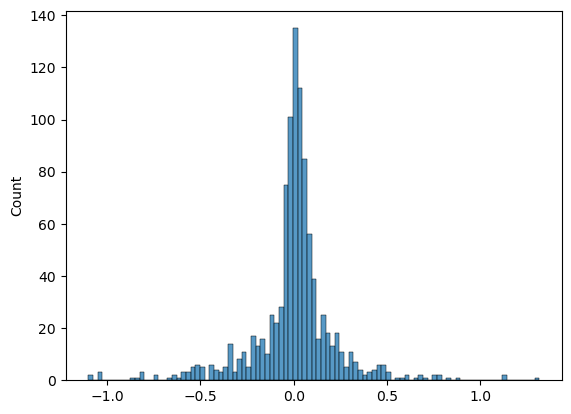

In [20]:
sns.histplot(snp_temperature_association.sample(1000))

In [21]:
snp_temperature_association

0          0.212089
1         -0.508398
2          0.003138
3          0.008127
4          0.214856
             ...   
3235475   -0.000834
3235476    0.025580
3235477    0.006649
3235478    0.650702
3235479   -0.716665
Length: 3235480, dtype: float64

In [22]:
snp_origin_bio1 = pd.DataFrame({'chrom': vcfgrene['variants/CHROM'], 'pos': vcfgrene['variants/POS'], 'snp_origin_bio1': snp_temperature_association})

In [24]:
snp_origin_bio1.to_csv('../key_files/snp_origin_bio1_1001gvcf.csv',index=None)

In [ ]:
## approxiamtion of block orgins 

In [25]:
snp_origin_bio1['id'] = snp_origin_bio1['chrom'].astype(str) + '_' + snp_origin_bio1['pos'].astype(str)

In [26]:
snp_origin_bio1['blocks'] = snp_origin_bio1['id'].map(reverse_mapping)

In [28]:
block_origin_bio1 = snp_origin_bio1.groupby('blocks')['snp_origin_bio1'].mean().reset_index()

In [29]:
block_origin_bio1.to_csv('../key_files/block_origin_bio1_1001g.csv',index=None)